# **Analyzing Website Performance for The Grammys**
*By: Jonathan (JT) Priest*

## Table of Contents
1. [Introduction](#introduction)
2. [Data Sources](#data-sources)
3. [Grammy.com Traffic Trends](#grammycom-traffic-trends)
4. [Awards Night Spike](#awards-night-spike)
5. [Pre/Post Domain Split Analysis](#domain-split-analysis)
6. [User Engagement Metrics](#user-engagement-metrics)
7. [Bounce Rate & Time on Site](#bounce-rate--time-on-site)
8. [Audience Demographics](#audience-demographics)
9. [Business Memo](#business-memo)
10. [Competitor Comparison (AMA)](#competitor-comparison)
11. [Final Thoughts](#final-thoughts)

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

In this project, I explore real web analytics data from both Grammy.com and RecordingAcademy.com to evaluate the impact of splitting the websites in 2022. Using Python (pandas, plotly), I uncover user engagement trends, demographic shifts, and make data-driven business recommendations.

## Data Dictionary

I will use two datasets: `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`. Each contains daily-level web analytics data with the following features:

- **date** – Date of activity (YYYY-MM-DD)
- **visitors** – Number of unique users visiting the site
- **pageviews** – Total number of pages viewed by all users
- **sessions** – Total user sessions (each representing a group of interactions)
- **bounced_sessions** – Sessions with no user interaction (user left after landing)
- **avg_session_duration_secs** – Average session duration (in seconds)
- **awards_week** – Binary flag indicating if date falls within Grammy awards marketing week
- **awards_night** – Binary flag for the actual Grammy awards ceremony night

These variables enable an analysis of how user engagement changes around key Grammy-related events, and how site structure affects behavioral patterns.


## Imports

To begin the analysis, I imported the core libraries: `pandas` for data manipulation and `plotly.express` for interactive data visualization.

In [232]:
# imported libraries
import pandas as pd
import plotly.express as px

# Datasets

Two primary datasets:

- **GRAMMY.com**: `grammy_live_web_analytics.csv`
- **RecordingAcademy.com**: `ra_live_web_analytics.csv`

Each file contains daily user activity, session behavior, and key event flags from 2017 to 2023.

In [233]:
# read csv
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')

rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

In [234]:
# full_df preview
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [235]:
# rec_academy preview
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Analyzing Grammy.com Traffic Trends

Understanding how high-profile events like the Grammy Awards influence web traffic is key to optimizing digital engagement. The charts below visualize daily visitor counts on Grammy.com across multiple years.

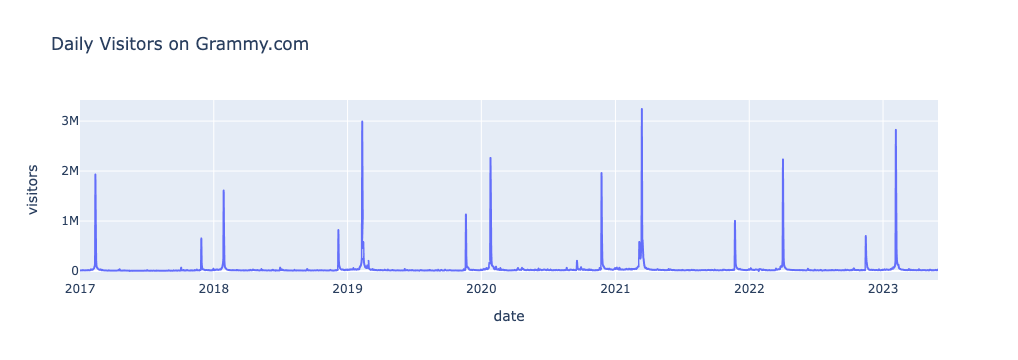

In [236]:
# line chart of daily visitors on the site
px.line(data_frame = full_df, 
        x = 'date',
        y = 'visitors',
        title = 'Daily Visitors on Grammy.com',
       )

**Analysis: Traffic Spikes and Their Possible Causes**

Web traffic to Grammy.com displays pronounced spikes around the annual Grammy Awards ceremony, typically held between January and April. However, notable traffic increases also occur 2–5 months prior to each award show, likely corresponding to nomination announcements. These early spikes suggest that both nominations and the ceremony itself are major engagement drivers.

For example, significant increases in web traffic align with the following nomination announcement dates:

November 24, 2020 (2021 Grammy nominations)

November 23, 2021 (2022 Grammy nominations)

November 15, 2022 (2023 Grammy nominations)

Additional smaller spikes may be attributed to artist-specific news, viral content, or promotional campaigns. These patterns reinforce the need for sustained digital engagement strategies before and after high-profile events.

To validate these trends, press releases from https://www.grammy.com/ serve as a reliable external reference point.

## Audience Spikes on Awards Night

Quantified the Grammy Awards’ impact on website traffic, average visitor numbers were compared between awards night and all other days:

In [237]:
# average number of visitors on awards nights vs. other nights
full_df.groupby('awards_night').agg({'visitors':'mean'})

,visitors
awards_night,
0,3.238828e+04
1,1.389590e+06


**Analysis: Awards Night Traffic**

This massive spike illustrates how heavily the site’s engagement depends on a single annual event.

- To combat this dependency, The Recording Academy could:

- Launch exclusive monthly artist content (e.g., interviews, behind-the-scenes footage)

- Run a recurring rewards program to encourage year-round visits with randomized prize incentives

- Create a Grammy Fan Hub with dynamic artist rankings, predictions, and fan polls to maintain momentum between shows



## Splitting Grammy.com Pre/Post Domain Change
In early 2022, The Recording Academy launched a separate website (recordingacademy.com), splitting its digital presence from grammy.com. This section evaluates how RecordingAcademy.com is performing, we divided the data into two time periods:

combined_site: Website traffic before the split (before February 1, 2022)

grammys: Website traffic after the split (February 1, 2022 and onward)


In [238]:
# split full_df into two new dataframes
combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df ['date'] >= '2022-02-01']

In [239]:
# .copy() prevents pandas from printing a warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [240]:
# combined_site shape
combined_site.shape

(1857, 8)

***Analyzing Key Metrics***

The goal of this section is to determine whether the split between grammy.com and recordingacademy.com improved user engagement. To do this, I’ll evaluate key metrics such as:

- Bounce rate

- Pages per session

- Average session duration

These metrics will reveal how user behavior changed post-split and whether the new domain strategy improved overall interaction with the site.

## Pages Per Session: Measuring User Engagement

Analyzing user engagement depth, I created a new metric called pages_per_session, which calculates the average number of pages viewed per session on a given day. This metric was derived for each of the three datasets by dividing the pageviews column by the sessions column:

In [241]:
# `pages_per_session` columns created for 3 dataframes
frames = [rec_academy, combined_site, grammys]

for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

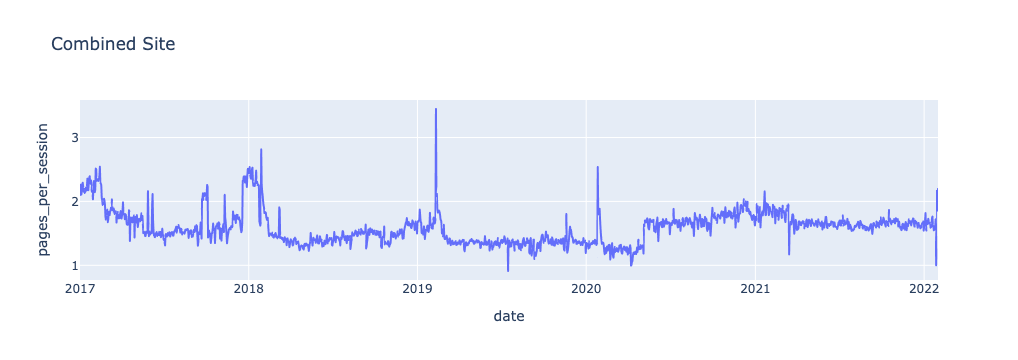

In [242]:
# combined_site graph
px.line(data_frame = combined_site,
        x = 'date',
        y = 'pages_per_session',
        title = 'Combined Site'
)

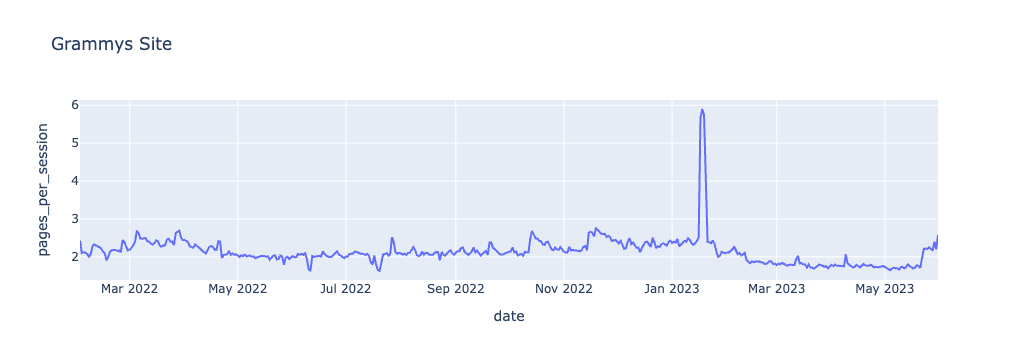

In [243]:
# grammys graph
px.line(data_frame = grammys,
        x = 'date',
        y = 'pages_per_session',
        title = 'Grammys Site'
)

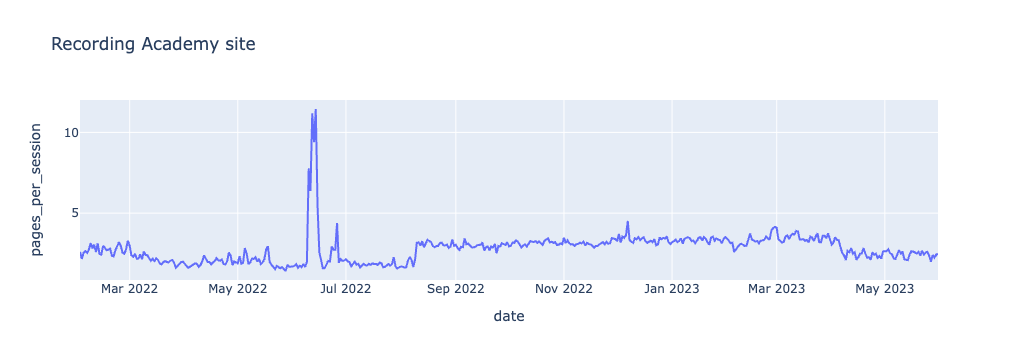

In [244]:
# rec_academy graph
px.line(data_frame = rec_academy,
        x = 'date',
        y = 'pages_per_session',
        title = 'Recording Academy site'
)

**Analysis: User Engagement**

The Recording Academy site consistently shows higher pages per session, indicating more engaged browsing behavior. This suggests users are exploring multiple areas of the site, likely due to informational or member driven content.

In contrast, the Grammys site sees sharp, short-term spikes in engagement during high profile events, such as the award ceremony, but generally lower page depth. This reflects more transactional user behavior, where visitors come for quick, event specific information.

These patterns imply that the Recording Academy site fosters ongoing interest, while the Grammys site attracts large bursts of short term attention. A strong long term strategy would focus on converting that traffic into returning users by enhancing off-season content.

## Analyzing Bounce Rate and User Engagement Across Sites

To assess how engaging each site is for first-time visitors, I calculated the bounce rate, the percentage of sessions where users exited without interacting. This metric is computed as:

**Bounce Rate = (Total Sessions / Total Bounced Sessions) × 100**

A higher bounce rate indicates that users are not finding immediate value or engaging content on arrival, while a lower rate suggests stronger initial engagement.

In [245]:
# bounce rate calculation function
def bounce_rate(df):
    """
    Calculates the bounce rate for a given website dataset.
    Bounce rate = (bounced sessions / total sessions) * 100
    """
    sum_bounced = df['bounced_sessions'].sum()
    sum_sessions = df['sessions'].sum()
    return 100 * sum_bounced / sum_sessions

In [246]:
# bounce rate for each site
for frame in frames:
    rate = bounce_rate(frame)
print(f'combined_site Bounce rate: {bounce_rate(combined_site):.2f}%')
print(f'grammys Bounce rate: {bounce_rate(grammys):.2f}%')
print(f'rec_academy Bounce rate: {bounce_rate(rec_academy):.2f}%')

combined_site Bounce rate: 41.58%
grammys Bounce rate: 40.16%
rec_academy Bounce rate: 33.67%


In [247]:
# average of the avg_session_duration_secs
for frame in frames:
    average_time_on_site = frame['avg_session_duration_secs'].mean()
print(f'combined_site Average Time on Site: {combined_site["avg_session_duration_secs"].mean():.2f} seconds')
print(f'grammys Average Time on Site: {grammys["avg_session_duration_secs"].mean():.2f} seconds')
print(f'rec_academy Average Time on Site: {rec_academy["avg_session_duration_secs"].mean():.2f} seconds')

combined_site Average Time on Site: 102.85 seconds
grammys Average Time on Site: 82.99 seconds
rec_academy Average Time on Site: 128.50 seconds


**Analysis: Bounce rate & Site time**

The metric that changed most significantly after the domain split was average time on site. The Recording Academy site now shows a much longer session duration (128.50s), suggesting users are engaging with more substantive content. In contrast, Grammy.com shows a lower average (82.99s), reflecting short, event driven visits. Bounce rates also improved slightly on RecordingAcademy.com, indicating stronger retention.

***Analyzing Age Demographics of Website Visitors***

Age demographics reveal which segments of the audience are most engaged with each site. By understanding which age groups drive the most traffic and interaction, digital strategy teams can better tailor content, advertising, and outreach to specific target audiences. This analysis draws on data from both websites and merges it into a unified dataset to compare user age distributions.

## Demographic Analysis

To begin the demographic analysis, age group data was imported from two datasets: one for Grammy.com and one for RecordingAcademy.com.

These datasets contain two key columns:

• `age_group` – The range of ages (e.g., 18–24, 25–34, etc.)

• `pct_visitors` – The percentage of all site visitors that fall within each age group.

After loading the data, a new column was added to each dataset to indicate which website the data represents.

In [248]:
# read csv
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [249]:
# age_grammys preview
age_grammys.head()

,age_group,pct_visitors
0,18-24,27.373210
1,25-34,24.129273
2,35-44,18.717867
3,45-54,13.568619
4,55-64,9.817036


In [250]:
# label 'Recording Academy'
age_grammys['website'] = 'Recording Academy'

# label 'Grammys'
age_tra['website'] = 'Grammys'

In [251]:
# concatenate dataframes
age_df = pd.concat([age_grammys, age_tra])

# age_df shape
age_df.shape

(12, 3)

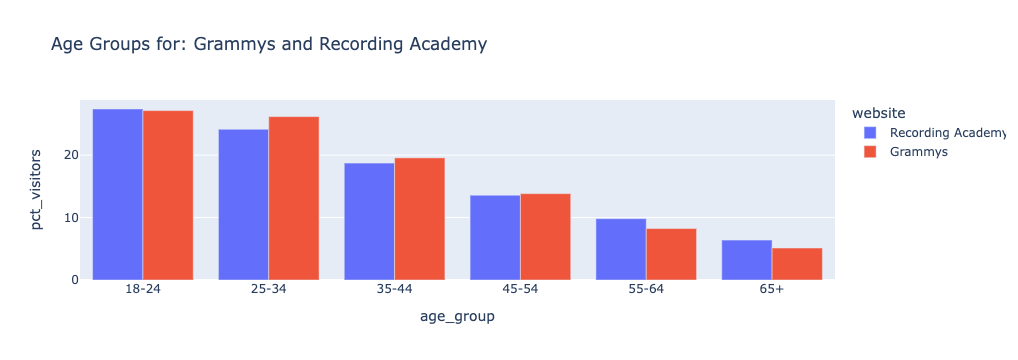

In [252]:
# age_group and pct_visitors bar chart
px.bar(data_frame = age_df,
       x = 'age_group',
       y = 'pct_visitors',
       color = 'website',
       barmode = 'group',
       title = 'Age Groups for: Grammys and Recording Academy'
)

***Analysis: Bar Chart Age Demographic***

After loading the data, a new website column was added to each dataset to clearly label which site the age group statistics belong to either Grammys or Recording Academy. These labeled datasets were then combined using pd.concat() into a single DataFrame called age_df, which contains 12 rows and 3 columns representing both sites' age breakdowns.

To visualize the demographic differences, a grouped bar chart was created using Plotly Express. The chart shows the percentage of total visitors from each age group, with distinct colors used to differentiate between the two websites.

The results highlight a clear generational divide:

- Grammy.com attracts a younger audience, especially in the 25–34 and 35–44 age ranges, suggesting event-driven interest and social media alignment.

- RecordingAcademy.com appeals more to older users, particularly those aged 55–64 and 65+, reflecting professional or institutional interest in the music industry.

- Age groups 18–24 and 45–54 are relatively consistent across both platforms, indicating moderate engagement across a wider age base.

## Interpreting Engagement Data & Recommending a Strategy

*After analyzing engagement trends and user behavior across both websites, I drafted the following business memo to Ray Stark, Vice President of Digital Strategy & Technology at The Recording Academy. The memo summarizes key findings and presents a recommendation based on the data.*


Dear Ray,

After analyzing the user engagement data from the split of Grammy.com and RecordingAcademy.com, there is a clear distinction in how users interact with each site. The data suggests that the separation has improved overall functionality and engagement.

Some key findings include:

- The bounce rate decreased from 41.58% (combined site) to 33.67% on the Recording Academy site, indicating users are more likely to engage with the content instead of leaving immediately.

- Users are viewing more pages per visit on the Recording Academy site, suggesting a deeper interest in exploring content.

- The average time on site increased from 102.85 seconds (combined site) to 128.5 seconds on the Recording Academy site, reflecting stronger engagement.

- The dominant visitor age groups are 18–24 and 25–34, aligning well with highly engaged, music-savvy demographics.

These insights support maintaining the two websites, Grammy.com and RecordingAcademy.com as separate platforms. This structure allows each site to better serve its distinct purpose and target audience. It also promotes higher engagement by aligning content with user intent.

Let me know if you’d like a visual summary of these metrics.

Thank you,
Jonathan (JT) Priest

# Competitive Comparison: Grammys vs. AMA Website Performance

This is to evaluate how RecordingAcademy.com (Grammys) is performing against its main competitor, the American Music Awards (AMA), I reviewed aggregated user data from April to June 2023. This included total visits, device distribution (desktop vs. mobile), and key engagement KPIs: bounce rate, pages per session, and average visit duration.

According to the AMA data, their site had an average session duration of 5 minutes and 53 seconds, 2.74 pages per visit, and a bounce rate of 54.31%. These figures serve as a benchmark for comparing the Grammys' digital performance.


In [253]:
# read data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [254]:
# desktop_users preview
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [255]:
# mobile_users preview
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


In [256]:
# name changed visitors column
desktop_users.rename(columns = {'visitors': 'desktop_visitors'}, inplace = True)
mobile_users.rename(columns = {'visitors': 'mobile_visitors'}, inplace = True)

In [257]:
# dropped unnecessary segment column
desktop_users.drop(columns='segment', inplace = True)
mobile_users.drop(columns='segment', inplace = True)

In [258]:
# joined dataframes
segment_df = pd.merge(desktop_users, mobile_users, on = 'date', how = 'inner')

In [259]:
# created total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
segment_df.head()

,date,desktop_visitors,mobile_visitors,total_visitors
0,2022-02-01,10195,23494,33689
1,2022-02-02,10560,20234,30794
2,2022-02-03,9935,22816,32751
3,2022-02-04,8501,18592,27093
4,2022-02-05,5424,13298,18722


In [260]:
# filtered and calculated the percentage share
segment_april_june = segment_df[segment_df['date'] >= '2023-04-01']

total_desktop = segment_april_june['desktop_visitors'].sum()
total_total = segment_april_june['total_visitors'].sum()

desktop_pct = 100 * total_desktop / total_total
mobile_pct = 100 - desktop_pct

print(f"Desktop Users: {desktop_pct:.2f}%")
print(f"Mobile Users: {mobile_pct:.2f}%")

Desktop Users: 31.84%
Mobile Users: 68.16%


***Analysis: Competitor AMA***

The Grammys website (RecordingAcademy.com) is performing well compared to the AMA’s site in key engagement metrics. It leads in:

- Bounce Rate: 33.67% vs. 54.31% (AMA) , users stay and interact more.

- Pages per Visit: 3.31 vs. 2.74 (AMA) , deeper browsing behavior.

However, AMA's site holds a significant lead in:

- Average Time on Site: 353 seconds (AMA) vs. 128.5 seconds , users stay longer.

This suggests that while the Grammys website is better at driving quick, meaningful engagement, the AMA site retains users longer. Improving session duration could close the gap.

